<a href="https://colab.research.google.com/github/MeeTK26/30DaysOfMLDL/blob/main/ObjectDetectionUsingSSD(day25).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torchvision.transforms as T
from torchvision.models.detection import ssd300_vgg16

model = ssd300_vgg16(pretrained=True)
model.eval()


COCO_LABELS = [
    "__background__", "person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck", "boat",
    "traffic light", "fire hydrant", "N/A", "stop sign", "parking meter", "bench", "bird", "cat", "dog", "horse",
    "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "N/A", "backpack", "umbrella", "N/A", "N/A", "handbag",
    "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat", "baseball glove", "skateboard",
    "surfboard", "tennis racket", "bottle", "N/A", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", "apple",
    "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", "chair", "couch", "potted plant",
    "bed", "N/A", "dining table", "N/A", "N/A", "toilet", "N/A", "tv", "laptop", "mouse", "remote", "keyboard", "cell phone",
    "microwave", "oven", "toaster", "sink", "refrigerator", "N/A", "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"
]



In [4]:
from PIL import Image
import requests
from io import BytesIO


image_url = "https://images.pexels.com/photos/1108099/pexels-photo-1108099.jpeg"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content)).convert("RGB")

In [5]:

transform = T.Compose([T.ToTensor()])
img_tensor = transform(image).unsqueeze(0)

with torch.no_grad():
    predictions = model(img_tensor)

In [6]:
scores = predictions[0]['scores'].numpy()
labels = predictions[0]['labels'].numpy()
bboxes = predictions[0]['boxes'].numpy()


threshold = 0.5
valid_indices = scores > threshold
filtered_bboxes = bboxes[valid_indices]
filtered_labels = labels[valid_indices]
filtered_scores = scores[valid_indices]


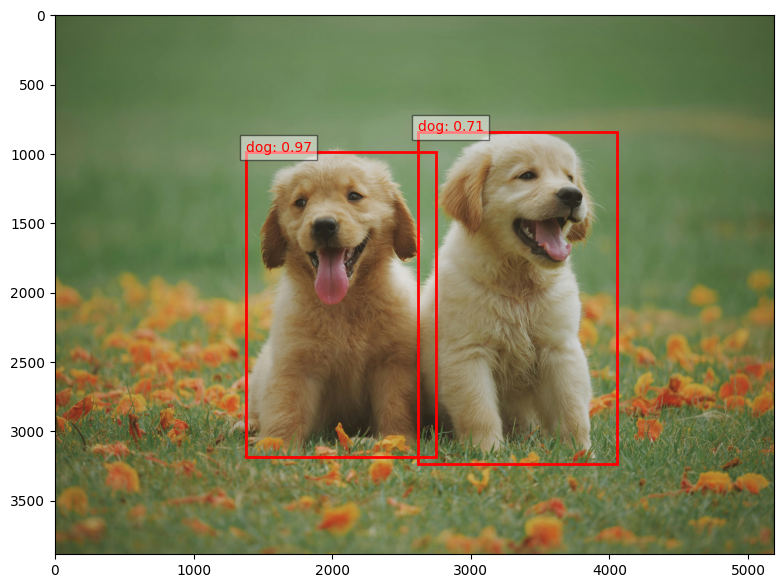

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(1, figsize=(10, 7))
ax.imshow(image)

for bbox, label, score in zip(filtered_bboxes, filtered_labels, filtered_scores):
    xmin, ymin, xmax, ymax = bbox
    rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)
    ax.text(xmin, ymin - 5, f"{COCO_LABELS[label]}: {score:.2f}", color='red', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.show()